# Regression homework

## Dataset

In this homework, we will use the __New York City Airbnb Open Data__. You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv) or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv) if you don't want to sign up to Kaggle.

The goal of this homework is to create a regression model for prediction apartment prices (column `price`).

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## EDA

### 1. Load the data.

In [2]:
# Download the dataset
!wget -O AB_NYC_2019.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-20 09:48:46--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  3.26MB/s    in 2.1s    

2021-09-20 09:48:49 (3.26 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 2. Look at the price variable. Does it have a long tail?

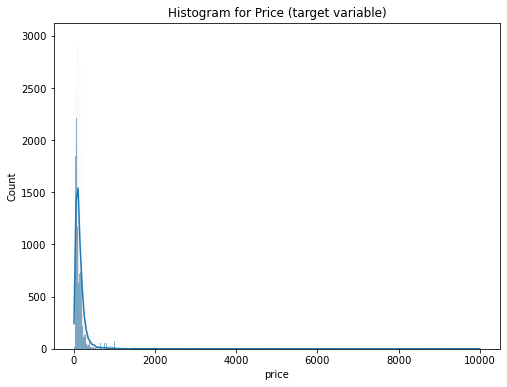

In [4]:
# Plot the price column
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Histogram for Price (target variable)')
plt.show()

Indeed, the price column is a tailed plot. It is positively skewed.

## Features

For the rest of the homework, you'll need to use only these columns:
- 'latitude',
- 'longitude',
- 'price',
- 'minimum_nights',
- 'number_of_reviews',
- 'reviews_per_month',
- 'calculated_host_listings_count',
- 'availability_365'

_Select only them._

In [5]:
df_sel = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]
df_sel.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,6,365
1,40.75362,-73.98377,225,1,45,2,355
2,40.80902,-73.94190,150,3,0,1,365
3,40.68514,-73.95976,89,1,270,1,194
4,40.79851,-73.94399,80,10,9,1,0


## Question 1

Find a feature with missing values. How many missing values does it have?

In [6]:
df_sel.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [7]:
df_sel['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Median for variable 'minimum_nights' is `3`

## Split the data

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('price') is not in your dataframe.
- Apply the log transformation to the price variable using the np.log1p() function.

In [8]:
np.random.seed(42)

n = len(df_sel)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_sel.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [9]:
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [10]:
# We didn't get any missing values in Q1.

In [11]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [12]:
X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

In [13]:
w_0, w = train_linear_regression(X_train, y_train)

In [14]:
y_pred = w_0 + X_train.dot(w)

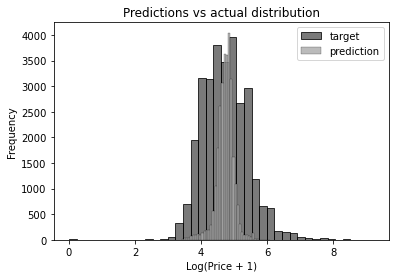

In [15]:
# Plot actual vs predicted
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [16]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return round(np.sqrt(mse), 2)

In [17]:
train_rmse = rmse(y_train, y_pred)
print('Train RMSE:', train_rmse)

Train RMSE: 0.64


In [18]:
# Validation set predictions
y_pred = w_0 + X_val.dot(w)

In [19]:
val_rmse = rmse(y_val, y_pred)
print('Validation RMSE:', val_rmse)

Validation RMSE: 0.64


## Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [20]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [21]:
r_options = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmses = []
for r in r_options:
    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w_0 + X_val.dot(w)
    rmses.append(rmse(y_val, y_pred))

In [22]:
pd.DataFrame({'r':r_options, 'rmse':rmses})

,r,rmse
0,0.000000,0.64
1,0.000001,0.64
2,0.000100,0.64
3,0.001000,0.64
4,0.010000,0.66
5,0.100000,0.68
6,1.000000,0.68
7,5.000000,0.68
8,10.000000,0.68


r = 0.0 gives least RMSE value.

## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [27]:
def train_val_test_split(seed = 42):
    np.random.seed(seed)

    n = len(df_sel)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_sel.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    X_train = df_train.drop('price', axis=1).values
    X_val = df_val.drop('price', axis=1).values
    X_test = df_test.drop('price', axis=1).values
    
    y_train = np.log1p(df_train.price)
    y_val = np.log1p(df_val.price)
    y_test = np.log1p(df_test.price)
    
    return X_train, X_val, X_test, y_train, y_val, y_test
    

In [28]:
seeds = range(10)
rmse_scores = []
for seed in seeds:
    X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(seed)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    rmse_ = rmse(y_val, y_pred)
    rmse_scores.append(rmse_)

print('Std. dev. for RMSE scores:', round(np.std(rmse_scores), 3))

Std. dev. for RMSE scores: 0.008


## Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [29]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(9)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
X_train = np.vstack([X_train, X_val])
y_train = np.vstack([y_train.values.reshape(-1, 1), y_val.values.reshape(-1, 1)]).ravel()
print(X_train.shape, y_train.shape)

(29337, 6) (29337,)
(9779, 6) (9779,)
(9779, 6) (9779,)
(39116, 6) (39116,)


In [30]:
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w_0 + X_test.dot(w)

print('Test RMSE:', rmse(y_test, y_pred))

Test RMSE: 0.65
